## Import wave file

In [70]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Audio

%matplotlib inline

In [23]:
from wavenet.utils import make_batch, normalize


In [17]:
inputs, targets = make_batch('assets/voice.wav')

In [18]:
inputs

array([[[-0.30196078],
        [-0.30196078],
        [-0.30196078],
        ..., 
        [-0.30196078],
        [-0.30196078],
        [-0.30196078]]])

In [19]:
targets

array([[89, 89, 89, ..., 89, 89, 89]])

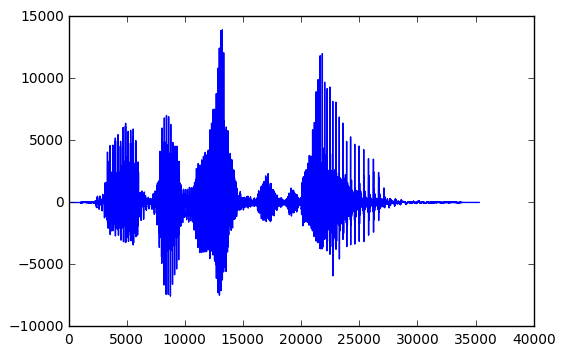

In [30]:
data = wavfile.read('assets/voice.wav')[1][:, 0]
plt.plot(data)
plt.show()

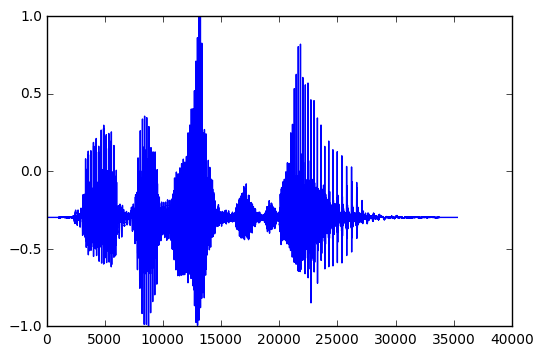

In [31]:
data_ = normalize(data)
plt.plot(data_)
plt.show()

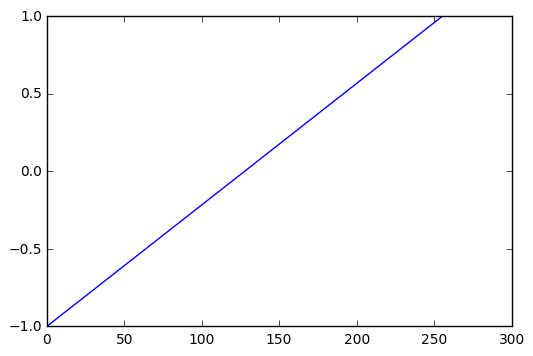

In [35]:
bins = np.linspace(-1, 1, 256)
plt.plot(bins)
plt.show()

### Quantize inputs.

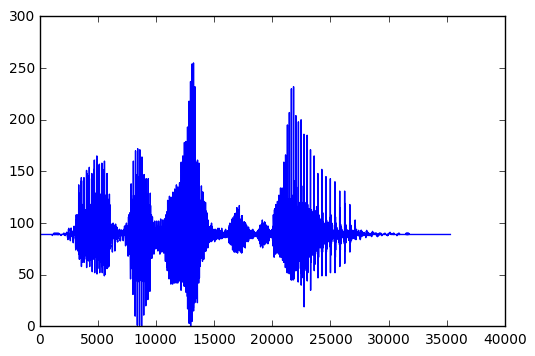

In [60]:
inputs = np.digitize(data_[0:-1], bins, right=False) - 1
plt.plot(inputs)
plt.show()

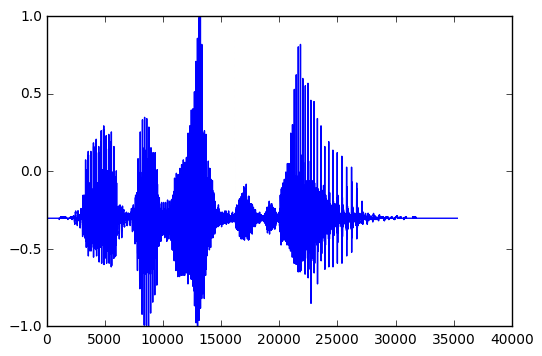

In [61]:
inputs = bins[inputs][None, :, None]
plt.plot(inputs[0])
plt.show()

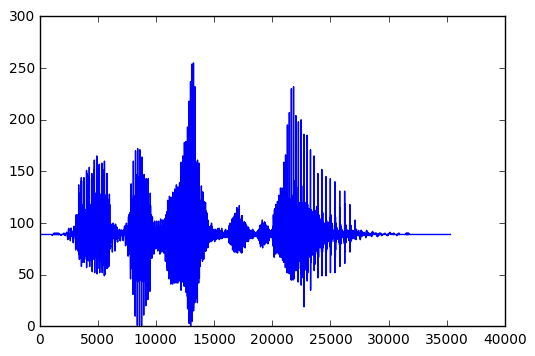

In [64]:
targets = (np.digitize(data_[1::], bins, right=False) - 1)[None, :]
plt.plot(targets[0])
plt.show()

In [65]:
print(inputs)
print(targets)

[[[-0.30196078]
  [-0.30196078]
  [-0.30196078]
  ..., 
  [-0.30196078]
  [-0.30196078]
  [-0.30196078]]]
[[89 89 89 ..., 89 89 89]]


In [71]:
Audio(inputs.reshape(inputs.shape[1]), rate=44100)

### Parameters of the model

In [66]:
num_time_samples = inputs.shape[1]
num_time_samples

35315

In [92]:
num_channels = 1
gpu_fraction = 1.0
num_blocks = 2
num_layers = 14
num_hidden = 128

## Model

In [72]:
from wavenet.models import Model

In [73]:
model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

### Looking inside

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from wavenet.layers import (_causal_linear, _output_linear, conv1d,
dilated_conv1d)

TensorFlow provides a placeholder operation that must be fed with data on execution.

In [84]:
model_inputs = tf.placeholder(tf.float32, shape=(None, num_time_samples, num_channels))
model_targets = tf.placeholder(tf.int32, shape=(None, num_time_samples))

In [103]:
h = model_inputs
hs = []
for b in range(num_blocks):
    for i in range(num_layers):
        rate = 2**i
        name = 'b{}-l{}'.format(b, i)
        print(rate, name)
        #h = dilated_conv1d(h, num_hidden, rate=rate, name=name)
        #hs.append(h)

(1, 'b0-l0')
(2, 'b0-l1')
(4, 'b0-l2')
(8, 'b0-l3')
(16, 'b0-l4')
(32, 'b0-l5')
(64, 'b0-l6')
(128, 'b0-l7')
(256, 'b0-l8')
(512, 'b0-l9')
(1024, 'b0-l10')
(2048, 'b0-l11')
(4096, 'b0-l12')
(8192, 'b0-l13')
(1, 'b1-l0')
(2, 'b1-l1')
(4, 'b1-l2')
(8, 'b1-l3')
(16, 'b1-l4')
(32, 'b1-l5')
(64, 'b1-l6')
(128, 'b1-l7')
(256, 'b1-l8')
(512, 'b1-l9')
(1024, 'b1-l10')
(2048, 'b1-l11')
(4096, 'b1-l12')
(8192, 'b1-l13')


#### dilated_conv1d

In [104]:
    '''
    
    Args:
      inputs: (tensor)
      output_channels:
      filter_width:
      rate:
      padding:
      name:
      gain:
      activation:
    Outputs:
      outputs: (tensor)
    '''

'\n\nArgs:\n  inputs: (tensor)\n  output_channels:\n  filter_width:\n  rate:\n  padding:\n  name:\n  gain:\n  activation:\nOutputs:\n  outputs: (tensor)\n'

##### Sharing Variables
    tf.variable_scope(name):
    
when building complex models you often need to share large sets of variables and you might want to initialize all of them in one place.